### 목표
- 이상한 나라의 앨리스 소설의 영문 텍스트에 전처리 방식들을 적용해보고 그 결과를 워드클라우드로 시각화 해보자!
- 워드 클라우드(Word Cloud) : 특정 단어의 빈도나 중요성을 글자의 크기로 나타낸 이미지

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
# 로이터 뉴스기사 데이터 임포트
from tensorflow.keras.datasets import reuters

### 데이터 로드

In [3]:
import nltk      #nltk(Natural Language Toolkit) : 영문 자연어 처리 라이브러리
nltk.download('gutenberg') # 저작권이 만료된 영어 소셜들을 제공하는 구텐베르크 프로젝트 다운로드

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [4]:
from nltk.corpus import gutenberg
file_names = gutenberg.fileids() # 구켄베르크 소셜들 제목 불러오기
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [5]:
doc_alice = gutenberg.open('carroll-alice.txt').read() # 이상한 나라의 앨리스 소설 불러오기
print('소셜의 길이 :', len(doc_alice)) # 소셜 내 문자 수
print(doc_alice[:500]) # 앞의 500자만 출력

소셜의 길이 : 144395
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


### 자연어 전처리
- 토큰화(tokenlzing) : 문서에서 토큰이라 불리는 단위로 문장이나 단어를 나누는 작업(나누는 기준은 단어, 띄워쓰기, 등 여러가지 방식이 있음)
- 어간추출(Stemming) : 어간(단어의 의미를 담고 있는 핵심 부분) 추출
- 표제어추출 : 표제어(기본 사전형 단어) 추출
- 불용어처리 : 일반적으로 분석대상이 아니거나 의미가 적은 단어 혹은 특수기호들을 제거

In [6]:
nltk.download('punkt') #punkt : 자연어 처리 토큰화 관련 모듈

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### 1) 토큰화(Tokenizing)

In [9]:
# word_tokenize : 단어를 기준으로 토큰화
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice)
print('토큰화 후 소셜의 토큰 수 :' , len(tokens_alice))
print(tokens_alice[:50])

# 기존 144,395개의 문자에서 33, 494 개의 토큰으로 변환됨

토큰화 후 소셜의 토큰 수 : 33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her']


### 2) 어간추출(Stremming)
#### nltk에서 Porter, Lancaster, Regexp, Snowball 4가지의 Stemmer를 제공
- Porter : Stemmer 중에서 가장 유명하며 1980년에 Porter씨가 제안
- Lancaster : Lancaster 대학에서 개발
- Regexp : 사용자가 지정한 정규표현을 기준으로 동작하며 Porter나 Lancaster가 처리하지 못하는 특수부분 처리시 사용
- Snowball : 영어 외에 13개 국가의 언어에 대한 Stemming을 제공

In [14]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
# 위에 만들어진 토큰들에 대해 PorterStemming 실행 후 그 결과를 리스트에 저장
stem_tokens_alice =[stemmer.stem(token)  for token in tokens_alice]
print("스테밍 후 토큰 수", len(stem_tokens_alice))
print(stem_tokens_alice[:50])

스테밍 후 토큰 수 33494
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin', 'to', 'get', 'veri', 'tire', 'of', 'sit', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'have', 'noth', 'to', 'do', ':', 'onc', 'or', 'twice', 'she', 'had', 'peep', 'into', 'the', 'book', 'her']


### 3) 표제어 추출(Lematization)

In [15]:
nltk.download('wordnet') # wordnet : 영어단어들의 관계에 대한 체계

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [22]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# 모든 토큰에 대해 Lemmatization 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print("표제어 추출 후 토큰 수 :", len(lem_tokens_alice))
print(lem_tokens_alice[:50])

표제어 추출 후 토큰 수 : 33494
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her']


### 우리는 Regexp Stemmer와 토크나이져가 결합된 RegexpTokenizer를 사용해 전처리해보자!

In [27]:
from nltk.tokenize import RegexpTokenizer
# 정규표현식 : 문자열에서 특정한 규칙을 가지는 문자열의 집합을 찾기 위한 검색 패턴(찾고 싶은 문자만 검색)
# [\w'] : \w는 문자, 숫자, _를 포함하며 대괄호, 작은따옴표 까지 검색 조건 설정
# {3.} : 3자리 이상의  단어만 검
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower()) # lower : 소문자 변환

print("RegexpTokenizer 적용 후 토큰 수", len(reg_tokens_alice))
print(reg_tokens_alice[:50])

RegexpTokenizer 적용 후 토큰 수 21616
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister', 'the', 'bank', 'and', 'having', 'nothing', 'once', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'had', 'pictures', 'conversations', "'and", 'what', 'the', 'use', 'book', 'thought', 'alice', "'without", 'pictures']


### 불용어 처리(Stopword)

In [28]:
# stopwords : 불용어(의미가 적은 문자나 특수기호 등) 처리를 위한 패키지
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
from nltk.corpus import stopwords
english_stops = stopwords.words('english') # 영문 불용어 처리

# 영문 불용어를 제외한 단어들로만 list를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print("불용어 제거 후 토큰 수 :", len(result_alice))
print(result_alice[:50])

# 토큰의 수는 기존 21,616에서 불용어 처리 후 12,999개로 줄어듬

불용어 제거 후 토큰 수 : 12999
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without", 'pictures', 'conversation', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'trouble']


In [32]:
# 영문 불용어 종류 100개 출력
english_stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
# [word for word in reg_tokens_alice if word not in english_stops] 코드 풀어서 해석

temp = []
for word in reg_tokens_alice :
  if word not in english_stops :
    temp.append(word)

len(temp)

12999

### 전처리 된 단어(토큰)의 빈도 계산
- result_alice 리스트에 있는 단어의 개수를 세고 빈도수가 큰 순으로 딕셔너리 형태로 정렬

In [36]:
alice_word_count = {}

for word in result_alice :
  # 빈 딕셔너리에 단어를 key로, 해당 단어의 개수(빈도수)를 value로 설정하여 넣기
  # get(word, 0) : 딕셔너리의 key 값에 word가 들어갔을때 value 값을 출력하며 key값이 없다면 0을 반환
  #                (맨 처음 빈 딕셔너리에 값을 추가할 때)
  # + 1 : 같은 key 값이 들어갈때 value(빈도수)를 +1 시켜주는 용도(한 번 들어온 key값이 또 들어올 떄)
  alice_word_count[word] = alice_word_count.get(word, 0) + 1

print("사용된 단어(토큰) 수" , len(alice_word_count)) # 단어(토큰)들의 유니크 값 개

# key=alice_word_count.get : alice_word_count 딕셔너리에 있는 value 값
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True) # 내림차순 절령

print("빈도수 상위 40개 단어 :")
for key in sorted_word_count[:40] :
  print(f"{key}:{alice_word_count[key]}", end=', ')

사용된 단어(토큰) 수 2687
빈도수 상위 40개 단어 :
said:462, alice:385, little:128, one:98, know:88, like:85, went:83, would:78, could:77, thought:74, time:71, queen:68, see:67, king:61, began:58, turtle:57, 'and:56, way:56, mock:56, quite:55, hatter:55, gryphon:55, think:53, much:51, say:51, first:50, head:49, thing:49, voice:48, rabbit:46, looked:45, never:45, got:45, get:44, must:44, mouse:42, round:41, well:40, came:40, 'you:40, 

### 워드클라우드로 시각화
- rew 텍스트 데이터와 전처리가 된 데이터의 워드클라우드를 비교해보자!

In [37]:
# 워드클라우드 라이브러리 설치
!pip install wordcloud

- 전처리가 되지 않은 텍스트로 워드클라우드 이미지 생성

In [38]:
from wordcloud import WordCloud

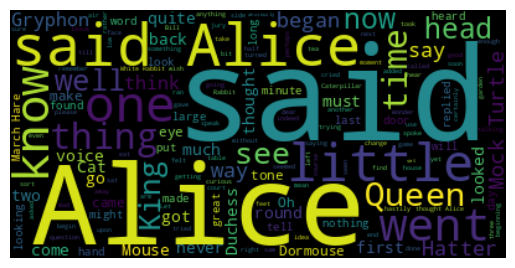

In [39]:
# generate : raw 텍스트(문자열)에서 단어의 빈도를 자동 계산하여 워드클라우드 생성
wordcloud = WordCloud().generate(doc_alice)


plt.axis('off') # 표의 좌표값 제거

plt.imshow(wordcloud, interpolation='bilinear');
# interpolation : 보간법(이미 알려진 값 사이의 값을 추정하는 것)
plt.show()

## 보간법 참조 블로그 : https://blog.naver.com/aorigin/220947541918

- 전처리가 된 단어(토큰)들로 워드클라우드 이미지 생성

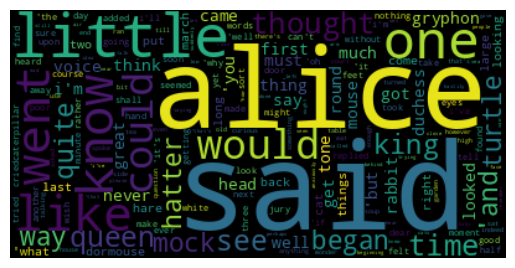

In [40]:
# generate_from_frequencies : 미리 정의된 딕셔너리에 있는 단어(key)의 빈도수(value)에 따라 워드클라우드 생성
wordcloud1 = WordCloud().generate_from_frequencies(alice_word_count)

plt.axis('off') # 표의 좌표값 제거

plt.imshow(wordcloud1, interpolation='bilinear');
plt.show()

- 전처리 되기 전 토큰들은 중복되어 표시되는 단어들도 보임
- 전처리 후 토큰들의 빈도는 'went':83,'think'.53 이었으며 전처리가 되지 않은 워드클라우드 에서는 went와 think의 크기 가 비슷하게 보이는 오류가 있음

#### 우리가 원하는 배경에 워드클라우드 출력하기

In [42]:
%cd /content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정

/content/drive/MyDrive/Colab Notebooks/SW캠프 데이터 비즈니스 과정


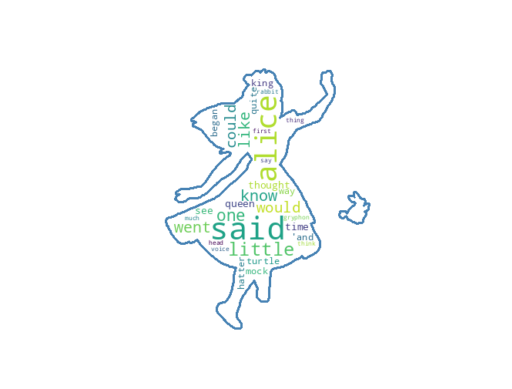

In [58]:
from PIL import Image
import numpy as np

alice = np.array(Image.open("data/alice.png"))

wc = WordCloud(background_color="white",      #워드클라우드 배경색 지정
               max_words= 30,                 # 출력할 최대 단어수
               mask=alice,                    # 배경으로 사용할 이미지
               contour_width=3,               # 테두리선의 크기
               contour_color="steelblue"      # 테두리선의 색상
               )
wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("data/alice_wc.png") # 워드클라우드 생성결과를 이미지 파일로 저장

# 화면에 출력시키기
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()
